In [213]:
import numpy as np
import pandas as pd
# Set option manually
pd.set_option('display.max_columns', 70)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

# Reading Pre-Processed Data

Reading data obtained ussing the PreProcessed Notebook.

All the data types were kept by saving it into a pickle format.

In [214]:
afr = pd.read_pickle('Data/preprocessed.pkl')

# Statisticall Analysis:

## Correlation Analysis

Correlation Analysis can be of use when assessing the relevance of numeric features against the target column (is_exciting)

In [3]:
afr.select_dtypes(exclude='uint8')

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,year_posted
projectid,,,,,,,,
ffffc4f85b60efc5b52347df489d0238,0.0,0.0,0.0,9.0,703.34,857.73,90.0,2009
ffffac55ee02a49d1abc87ba6fc61135,57.0,0.0,7.0,35.0,207.43,244.04,8.0,2011
ffff97ed93720407d70a2787475932b0,100.0,0.0,3.0,35.0,440.01,517.66,25.0,2010
ffff418bb42fad24347527ad96100f81,100.0,0.0,1.0,17.0,798.85,974.21,20.0,2009
ffff2d9c769c8fb5335e949c615425eb,63.0,6.0,2.0,30.0,579.74,682.05,25.0,2013
...,...,...,...,...,...,...,...,...
0000ee613c92ddc5298bf63142996a5c,0.0,2.0,4.0,30.0,384.86,452.78,19.0,2013
0000b38bbc7252972f7984848cf58098,50.0,0.0,2.0,30.0,547.86,644.54,36.0,2013
00002d691c05c51a5fdfbb2baef0ba25,100.0,0.0,5.0,35.0,892.31,1049.78,250.0,2010


In [4]:
# Calculating correlations
corrs = []

for CORR in ['pearson', 'kendall', 'spearman']:
    # Calculating correlation and keeping it for 'is_exciting' column
    target_corr = (afr
                        .select_dtypes(exclude='uint8') # excluding binary columns
                        .assign(is_exciting = afr.is_exciting) # adding target column to the calculation
                        .corr(method=CORR) # Calculating correlation
                        .loc[:, ['is_exciting'] ] # Keeping Target column
                        .rename(columns={'is_exciting':CORR}) # Renaming column
                        .sort_values(by=[CORR], ascending=False) # Sorting
                        #.iloc[:20,:] # Keeping top 10
                    )

    # Appending into list
    corrs.append(target_corr)

# Compile all correlations
df = pd.concat(corrs, axis=1).drop(index='is_exciting')

Text(0.5, 1.0, "Correlation coeficients with 'is_exciting' column for numeric features")

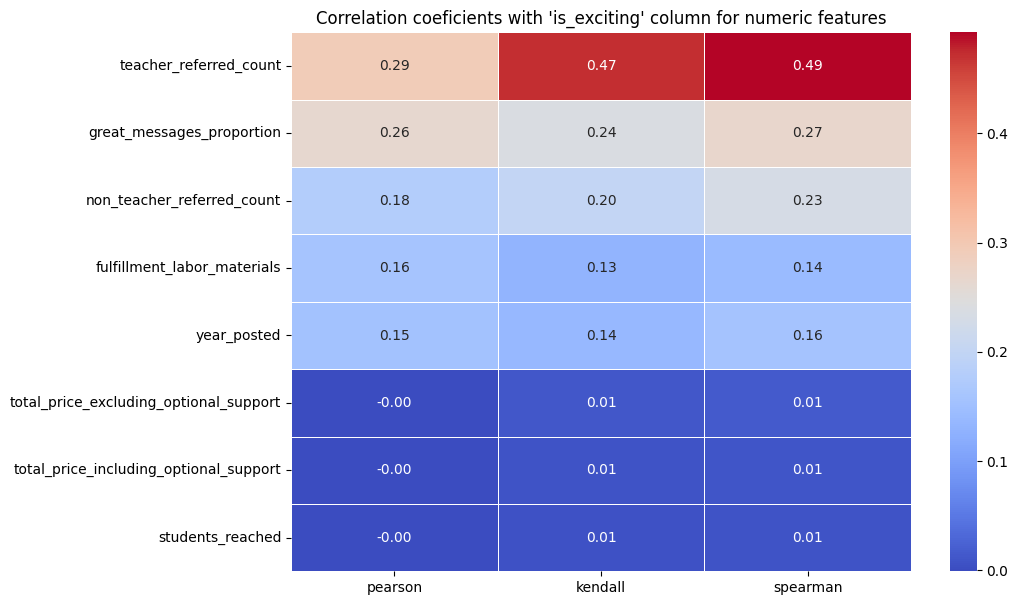

In [6]:
plt.figure(figsize=(10, 7))
sns.heatmap(df,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            square=False,
            linewidths=0.5)
plt.title(f"Correlation coeficients with 'is_exciting' column for numeric features")

From the above matrix is noted that columns refering to the prices and students reach (bottom 3) aren't relevant for the task at hand.

The **teacher's referral** (top 1st) comes up with a positive intermediate correlation coefficients, specially non-linear (kendall, spearman) making it relevant when trying to determine interesting projects.

From the Exploration notebook is noted that these distributions contain extreme values:

array([[<Axes: title={'center': 'great_messages_proportion'}>,
        <Axes: title={'center': 'teacher_referred_count'}>,
        <Axes: title={'center': 'non_teacher_referred_count'}>],
       [<Axes: title={'center': 'fulfillment_labor_materials'}>,
        <Axes: title={'center': 'total_price_excluding_optional_support'}>,
        <Axes: title={'center': 'total_price_including_optional_support'}>],
       [<Axes: title={'center': 'students_reached'}>,
        <Axes: title={'center': 'year_posted'}>, <Axes: >]], dtype=object)

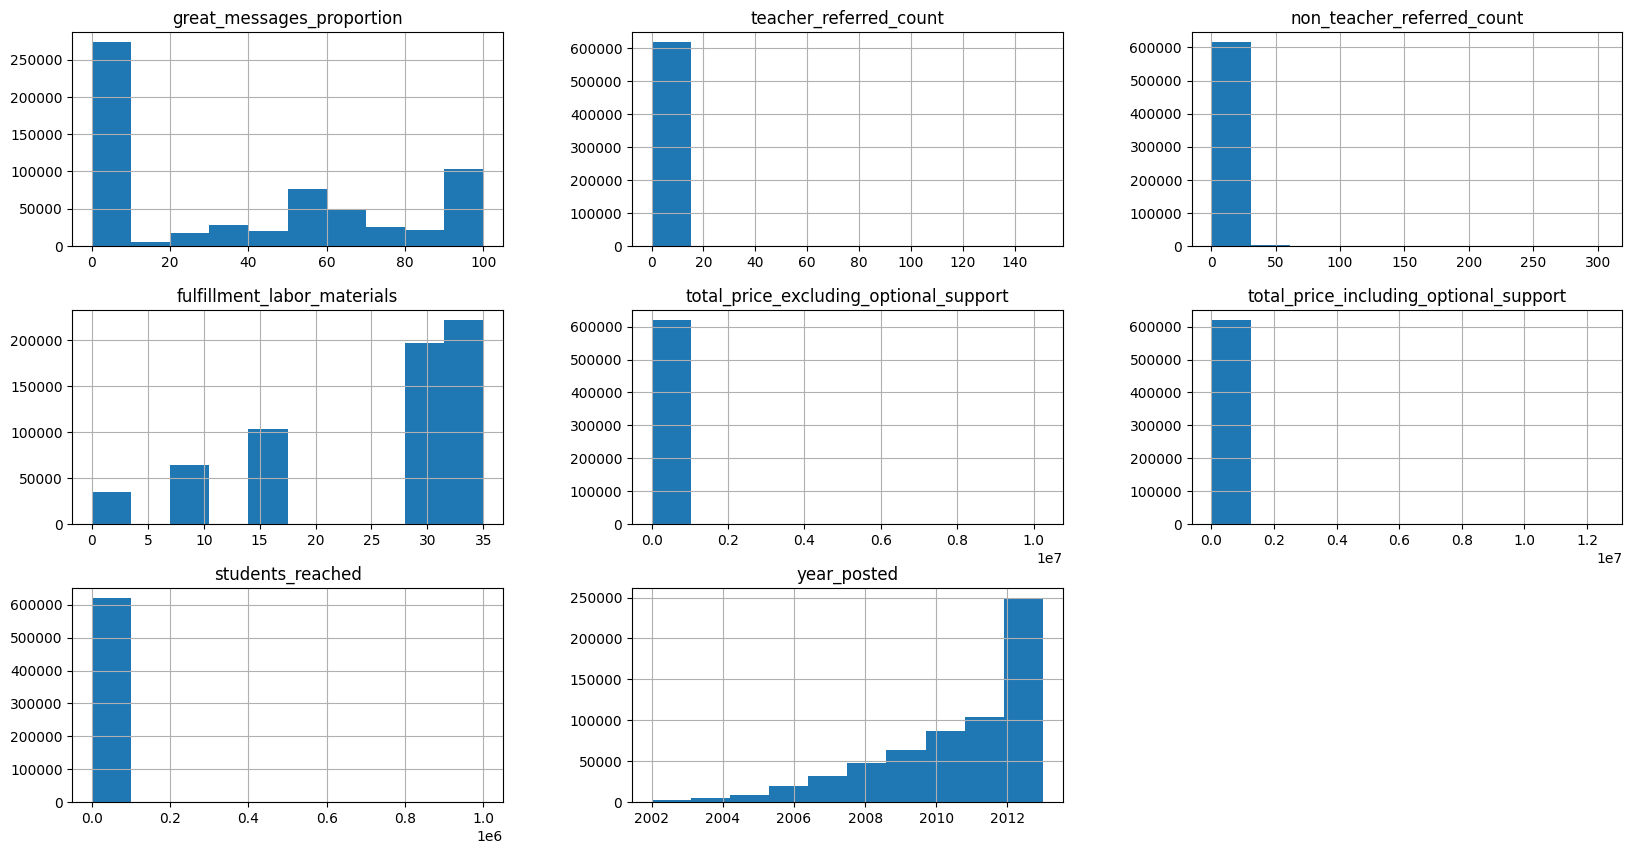

In [7]:
afr.select_dtypes(exclude='uint8').hist(figsize=(20,10))

Before stablishing conclussions on discarding them, let's take a look into the statistics of each with the target value:

In [8]:
(afr
    .select_dtypes(exclude='uint8') # excluding binary columns
    .assign(is_exciting = afr.is_exciting) # adding target column to the calculation
    .groupby(by='is_exciting')
    .describe()
    .stack(level=0)
    .swaplevel(0, 1)
    .sort_index(level=0)
    .reindex(['std', 'min', '25%', '50%', 'mean', '75%', 'max'], axis=1)
)

std      min  \
                                       is_exciting                          
fulfillment_labor_materials            0               10.925235     0.00   
                                       1                2.664202     9.00   
great_messages_proportion              0               38.166583     0.00   
                                       1               12.109529    62.00   
non_teacher_referred_count             0                5.177543     0.00   
                                       1                7.741322     0.00   
students_reached                       0             2436.877810     0.00   
                                       1              138.883981     0.00   
teacher_referred_count                 0                1.868137     0.00   
                                       1                3.275403     1.00   
total_price_excluding_optional_support 0            13532.249402     0.00   
                                       1              626.847128    89.12   
total_price_including_optional_support 0            16501.267206     0.00   
                                       1              737.537201   104.85   
year_posted                            0                2.222724  2002.00   
                                       1                1.087681  2010.00   

                                                          25%       50%  \
                                       is_exciting                        
fulfillment_labor_materials            0              17.0000    30.000   
                                       1              30.0000    35.000   
great_messages_proportion              0               0.0000    25.000   
                                       1              66.0000    75.000   
non_teacher_referred_count             0               1.0000     2.000   
                                       1               3.0000     6.000   
students_reached                       0              22.0000    30.000   
                                       1              23.0000    31.000   
teacher_referred_count                 0               0.0000     0.000   
                                       1               1.0000     2.000   
total_price_excluding_optional_support 0             264.7275   410.180   
                                       1             298.1525   417.395   
total_price_including_optional_support 0             315.3500   487.560   
                                       1             350.5425   491.050   
year_posted                            0            2009.0000  2011.000   
                                       1            2011.0000  2012.000   

                                                           mean        75%  \
                                       is_exciting                           
fulfillment_labor_materials            0              25.332370    35.0000   
                                       1              32.500899    35.0000   
great_messages_proportion              0              35.006807    66.0000   
                                       1              78.050722    85.0000   
non_teacher_referred_count             0               3.455264     4.0000   
                                       1               7.525770     9.0000   
students_reached                       0              97.989283   100.0000   
                                       1              88.333887   100.0000   
teacher_referred_count                 0               0.506953     0.0000   
                                       1               3.069681     4.0000   
total_price_excluding_optional_support 0             538.594048   581.0700   
                                       1             494.522591   569.7775   
total_price_including_optional_support 0             641.642968   691.1300   
                                       1             581.717963   670.2975   
year_posted                            0            2010.409563  2012.0000 

And also represent each of them graphically when sliced by "is_exciting":

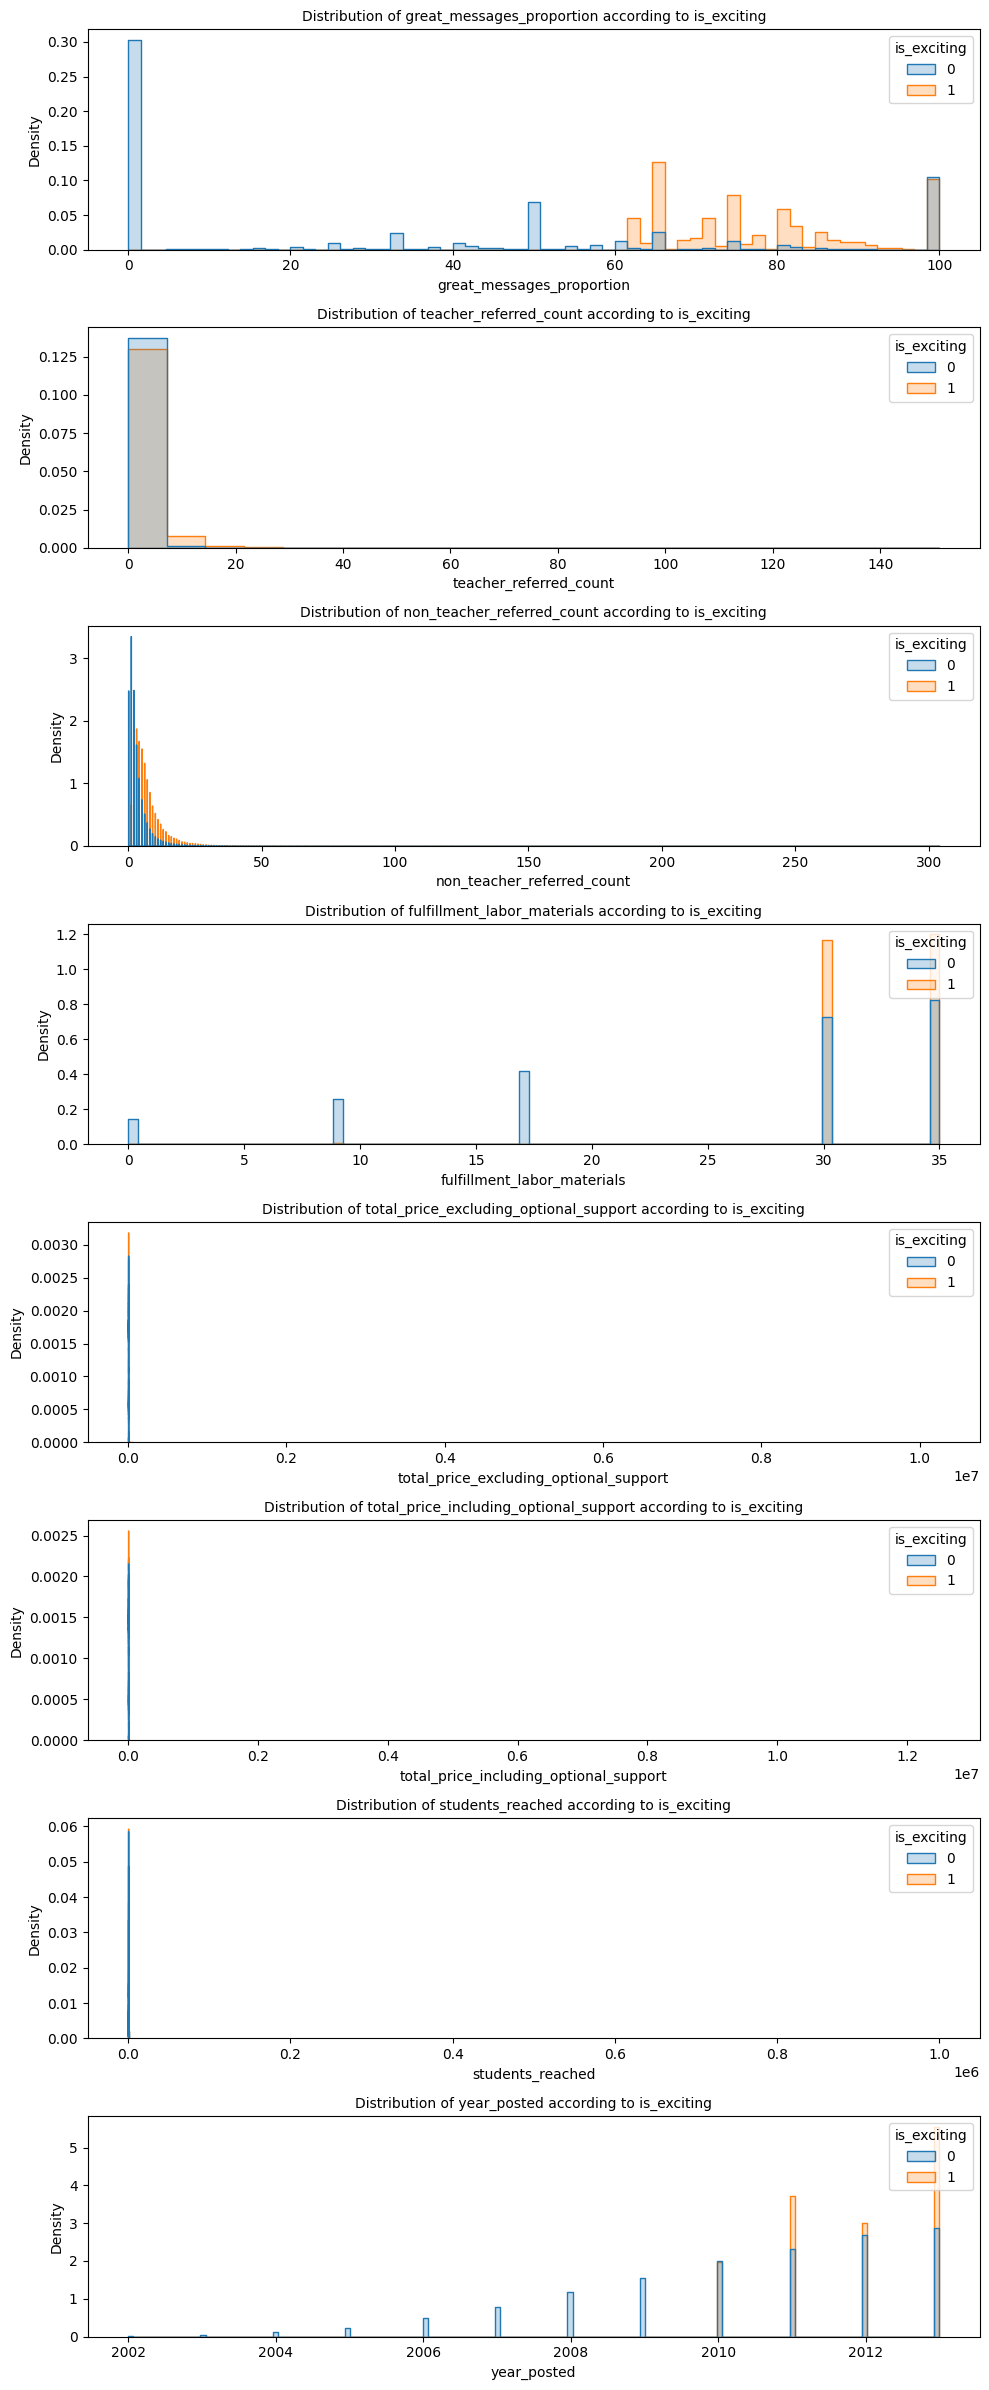

In [9]:
# Aggregating
fr = (afr
        .select_dtypes(exclude='uint8') # excluding binary columns
        .assign(is_exciting = afr.is_exciting)
        #.query("(total_price_excluding_optional_support <= 1200) and (students_reached <= 400)")
        )

binary_column = 'is_exciting'
cols = fr.columns
n_cols = len(cols) - 1 # exclude the binary column itself

fig, axes = plt.subplots(n_cols, 1, figsize=(10, 3 * n_cols))

for i, col in enumerate(cols):
    if col != binary_column:
        sns.histplot(data=fr, x=col, hue=binary_column, element='step', stat='density', common_norm=False, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} according to {binary_column}', fontsize=10)

plt.tight_layout()
plt.show()

Three columns showcase extreme values and graphically are difficult to assess (total columns and students_reached), by removing some of these outliers using the aggregated statistics above to inform on the best cut-off point and doing a correlation analysis:

In [119]:
(afr
    .select_dtypes(exclude='uint8')
    .assign(is_exciting = afr.is_exciting)
    .query("(total_price_excluding_optional_support <= 1200) and (students_reached <= 400)") # Filtered outliers
    .corr(method='kendall')
    .loc[:, ['is_exciting']]
    .drop(index=['is_exciting'])
    .style.background_gradient(cmap='coolwarm')
)

,is_exciting
great_messages_proportion,0.239515
teacher_referred_count,0.476738
non_teacher_referred_count,0.199851
fulfillment_labor_materials,0.129722
total_price_excluding_optional_support,0.018849
total_price_including_optional_support,0.014463
students_reached,0.010286
year_posted,0.139323


Turns out that correlations stay within the same range as before.Most likely the total columns and students_reached are to be discarded.

## T-Test

Regarding the remaining columns, the aggregated statistics hint the possibility of group differences between groups (is_exciting = 0 | is_exciting = 1) let's be certain before discarding any by conducting a T-test as a final test for the numeric columns:

In [11]:
target_column = 'is_exciting'
cols = fr.columns.drop(target_column)

for col in cols:

    # Slicing groups
    gr_not_exciting = fr.query(f"{target_column} == 0")[col]
    gr_its_exciting = fr.query(f"{target_column} == 1")[col]

    t_statistic, p_value = ttest_ind(gr_not_exciting, gr_its_exciting)

    print('-'*5, '>', col, f'| P-value: {np.round(p_value, 4)}')
    #print(f'T-statistic: {t_statistic}')
    #print(f'P-value: {np.round(p_value, 4)}')


----- > great_messages_proportion | P-value: 0.0
----- > teacher_referred_count | P-value: 0.0
----- > non_teacher_referred_count | P-value: 0.0
----- > fulfillment_labor_materials | P-value: 0.0
----- > total_price_excluding_optional_support | P-value: 0.5327
----- > total_price_including_optional_support | P-value: 0.4866
----- > students_reached | P-value: 0.4478
----- > year_posted | P-value: 0.0


Considering a cut-off point for the p-value of 0.05, the results above can be divided in two groups:

- *p-value close to 0:* suggests that there is a statistically significant difference between the means of the two groups. The smaller the p-value, the stronger the evidence to reject the null hypothesis in favor of the alternative hypothesis (which states that there is a significant difference between the groups). Therefore, the columns above with a p-value close to 0 are considered to be statistically significant in predicting the target variable.

- *p-value close to 0.5:* A p-value around 0.5 suggests that there is no statistically significant difference between the means of the two groups under comparison. This high p-value indicates that you fail to reject the null hypothesis, implying that these columns may not be very useful in predicting the target variable, as they do not show a significant association with the target variable.

By the correlations and T-tests, *both total prices and students_reached* columns are not showing relevance when compared with the "is_exciting" column.

# Binary Columns Relevance

Since the ammount of binary columns is considerable, let's start assessing their relevance by use of a tree based model and analyze the scoring of each. Let's start with XGB (Extreme Gradient Boosted)

In [32]:
# separating data and target column
X = afr.drop(columns=['is_exciting'])
y = afr['is_exciting']

model = xgb.XGBClassifier(objective='binary:logistic', random_state=23)
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=23, ...)

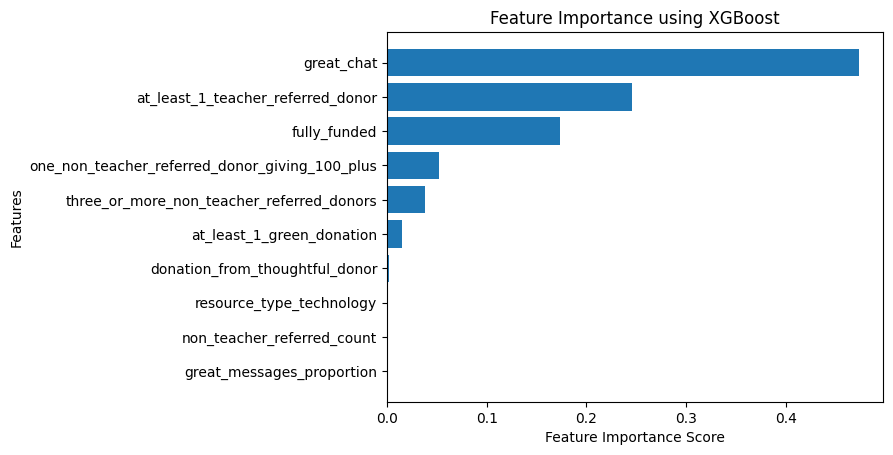

In [38]:
feature_importances = model.feature_importances_
feature_names = X.columns

# Get the top most important features (6 are the ones more relevant)
N = 10
top_features_idx = feature_importances.argsort()[-N:] # Get top ordered features indexes to properly get names and values
top_feature_importances = feature_importances[top_features_idx]
top_feature_names = feature_names[top_features_idx]

# Creating a bar plot for feature importances
plt.barh(top_feature_names, top_feature_importances)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using XGBoost')
plt.show()

After the top 6, the relevance of the other columns fade to zero.

It could be interesting now to check the relevance based on other algorithms and include a linear model other type of dependencies. Let's start by declaring a function that will help to compile the scoring of each model

In [50]:
def get_feature_importance(importances, feature_names, model_name, N) -> pd.DataFrame:
    """
    Function to help obtain in DataFrame format the feature relevances for a top N
    """

    # Get the top N most important features
    top_features_idx = importances.argsort()[-N:]  # Get top ordered features indexes to properly get names and values
    top_feature_importances = importances[top_features_idx]
    top_feature_names = feature_names[top_features_idx]

    # Return Frame with Feature importance
    return pd.DataFrame({f'Top_{N}_columns' : top_feature_names, f'{model_name}_relevance_value': top_feature_importances}).set_index(f'Top_{N}_columns')

Now let's compile XGB, Random Forest and Logistic Regression scores for the top 15 most relevant columns and keep the columns that show relevance on at least two:

In [63]:
# Number of top features to display
N = 15

# Dict to save Coef frame
coef = {}

# Train and plot feature importance for XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', random_state=23)
model.fit(X, y)
coef['XGB'] = get_feature_importance(model.feature_importances_, X.columns, 'XGB', N)

# Train and get feature importance for Random Forest
model = RandomForestClassifier(random_state=23, n_estimators = 1000)
model.fit(X, y)
coef['RF'] = get_feature_importance(model.feature_importances_, X.columns, 'RF', N)

# Scale the data using RobustScaler for Logistic Regression
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Train and get feature importance for Logistic Regression (using coefficients as importance)
model = LogisticRegression(random_state=23, max_iter=1000)
model.fit(X_scaled, y)
# Logistic can contain negative coeficients, abs value applied to coef.
coef['LR'] = get_feature_importance(abs(model.coef_[0]), X.columns, 'LR', N) 

In [67]:
# Compiling in DataFrame
dfcoef = (
        coef['XGB']
            .merge( coef['RF'], left_index=True, right_index=True, how='outer' )
            .merge( coef['LR'], left_index=True, right_index=True, how='outer' )
            .pipe( lambda _df: _df.assign( times_relevant = _df.isna().sum(axis=1) ) ) # There are 3 models counting how many times the column was in top N
            .query( "times_relevant < 2" )
            .drop(columns=['times_relevant'])
        )

dfcoef

,XGB_relevance_value,RF_relevance_value,LR_relevance_value
Top_15_columns,,,
at_least_1_green_donation,0.014976,0.017570,15.177216
at_least_1_teacher_referred_donor,0.245937,0.189457,20.759231
donation_from_thoughtful_donor,0.001708,NaN,3.529016
fulfillment_labor_materials,0.000004,0.010557,0.739967
fully_funded,0.173044,0.063972,16.624546
great_chat,0.473827,0.178473,19.853732
great_messages_proportion,0.000009,0.202386,0.249425
non_teacher_referred_count,0.000012,0.033275,NaN
one_non_teacher_referred_donor_giving_100_plus,0.052198,0.037931,7.666622


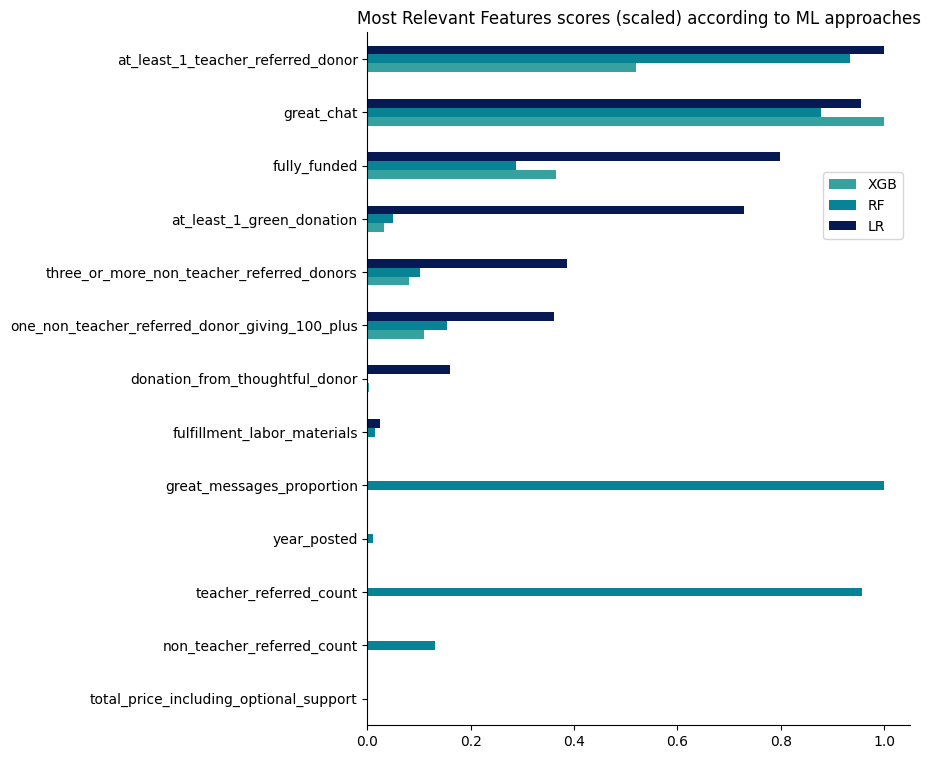

In [114]:
from sklearn.preprocessing import MinMaxScaler

# Scaling data because LR Coef are on a different scale and makes the comparing difficult.
scaler = MinMaxScaler()
dfcoef_normalized = pd.DataFrame(scaler.fit_transform(dfcoef), columns=dfcoef.columns, index=dfcoef.index)

ax = (dfcoef_normalized
        .assign(ordering_col = dfcoef.sum(axis=1))  # Column to help with ordering
        .sort_values(by='ordering_col')
        .drop(['ordering_col'], axis=1)
        .rename(columns=lambda C: C.replace('_relevance_value', ''))
    ).plot.barh(figsize=(7,9), color=['#35A29F', '#088395', '#071952'], title=f'Most Relevant Features scores (scaled) according to ML approaches')

# Move the legend to outside the top of the plot
ax.legend(loc='right', bbox_to_anchor=(1, 0.75))
ax.set_ylabel('')
sns.despine(top=True, right=True)

plt.show()

In [118]:
# (Below for KPI construction) Almost Great Chat
(afr
    .loc[:, ['great_messages_proportion', 'is_exciting']]
    .groupby(by=[ 'is_exciting'])
    .describe()
    )

great_messages_proportion                                          \
                                count       mean        std   min   25%   50%   
is_exciting                                                                     
0                            582616.0  35.006807  38.166583   0.0   0.0  25.0   
1                             36710.0  78.050722  12.109529  62.0  66.0  75.0   

                          
              75%    max  
is_exciting               
0            66.0  100.0  
1            85.0  100.0

# Conclusions:

After assessing the numeric and binary columns in the dataset by means different means (statistics, statisticall tests, correlations, ML feature relevance) it is without a doubt that the endorsement of teachers and social components drive projects to success, along with hitting the founding milestone.

- Regarding teacher endorsment, at least some of support from teachers plays an important role into an interesting project and relevance.

- Regarding the social component, is imperative to highligh the "great_chat" variable, that according to the metadata's definition is created by applying a cut-off at projects with unique comments higher than average for *"great_messages_proportion"*(62% at the momment). Therefore, one important dimension for exciting projects is keeping track of messages. On a second note, columns that account for green donations, non-teachers support and thoughtful donors showcase even more relevance when analyzed using linear models.

In short, although exciting projects definition is given in the metadata, after the different assessments it was showed how the same variables showcase relevance at all levels of analysis:

* fully_funded
* at_least_1_teacher_referred_donor
* great_chat
* at_least_1_green_donation
* three_or_more_non_teacher_referred_donors
* one_non_teacher_referred_donor_giving_100_plus
* donation_from_thoughtful_donor

Some other variables such as _fulfillment_labor_materials_ and *year_posted*, although they showed statisticall difference between _is_exciting_ groups at further stages it didn't show relevance when assessing its importance as variable.

# Business KPIs for improvement: 
Assuming "DonorsChoose.org" goals is early detection of interesting projects, some reasonables KPI's to track could be:

* **Nr Projects Getting Exciting**: Early Detection of projects with promising *great_messages_proportion*. This could be the case of projects within 1 standard deviation from the mean (ie, at 50%, cut-off is 62%) and is about to reach founding. From the Exploration, is noticed this fact. Below are some summary statistics to make the case for the KPI:

In [158]:
# Reading Donations
dfdon = pd.read_csv('Data/donations.csv')

# Display Statistics between 'is_exciting', 'great_chat', 'total_price_excluding_optional_support'
(dfdon
    .loc[:, ['projectid', 'donation_to_project']]
    .groupby(by='projectid')
    .sum()
    .merge(afr.loc[:, ['is_exciting', 'great_chat', 'total_price_excluding_optional_support']], left_index=True, right_index=True, how='right')
    .fillna(0)
    .pipe(lambda _df: _df.assign( financial_completion_prop = _df.donation_to_project/_df.total_price_excluding_optional_support ))
    .fillna(0)
    .replace([np.inf, -np.inf], value=1)
    .groupby(['is_exciting', 'great_chat'])
    .describe()
    .T
    .loc['financial_completion_prop',:]
    .T
    )

count      mean       std       min       25%  50%  \
is_exciting great_chat                                                          
0           0           432156.0  0.690427  0.854984  0.000000  0.046831  1.0   
            1           150460.0  0.739636  0.398900  0.000000  0.270410  1.0   
1           1            36710.0  1.000325  0.014755  0.500027  1.000000  1.0   

                        75%         max  
is_exciting great_chat                   
0           0           1.0  404.222222  
            1           1.0    1.950513  
1           1           1.0    1.994400

<Axes: xlabel='is_exciting', ylabel='financial_completion_prop'>

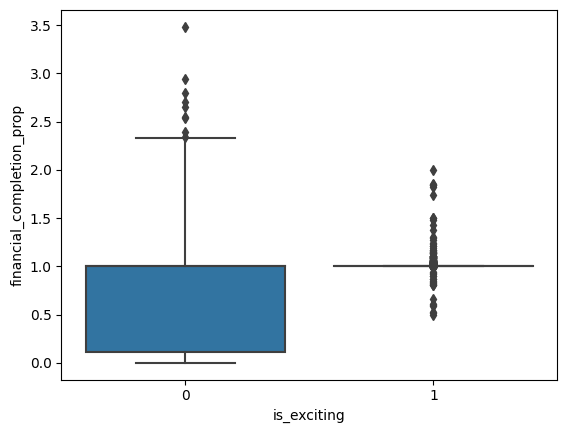

In [156]:
# Create boxplot (filtering some outliers for representation)
FR = (dfdon
        .loc[:, ['projectid', 'donation_to_project']]
        .groupby(by='projectid')
        .sum()
        .merge(afr.loc[:, ['is_exciting', 'total_price_excluding_optional_support']], left_index=True, right_index=True, how='right')
        .fillna(0)
        .pipe(lambda _df: _df.assign( financial_completion_prop = _df.donation_to_project/_df.total_price_excluding_optional_support ))
        .fillna(0)
        .replace([np.inf, -np.inf], value=1)
        .loc[:, ['financial_completion_prop', 'is_exciting'] ]
    )

# Create a boxplot limited
sns.boxplot(x='is_exciting', y='financial_completion_prop', data=FR.query("financial_completion_prop <= 4") )

Another KPI:

* **Time to exciting:** The ammount of time (days, weeks, months...) that takes a project from its posting to "is_exciting" status could be of use into prioritizing recomendations. This variable can be engineered by means of _donations.csv_.

Below is the calculation and crossing of the days that a project is getting donations:

In [201]:
# Getting registered donation days
dftime = (dfdon
            .loc[:, ['projectid', 'donation_timestamp'] ]
            .astype({'donation_timestamp' : np.datetime64})
            .pipe(lambda _df: _df.assign( date = _df.donation_timestamp.dt.strftime("%Y-%m-%d") ) )
            .drop(columns=['donation_timestamp'])
            .groupby(by='projectid')
            .agg({'min', 'max'})
            .pipe(lambda _df: _df.assign( days = ((_df[('date','max')].astype(np.datetime64) - _df[('date','min')].astype(np.datetime64))/np.timedelta64(1,'D')) + 1 ) )
            )

dftime.columns = [a+'_'+b for (a,b) in dftime.columns]

dftime

,date_min,date_max,days_
projectid,,,
00001ccc0e81598c4bd86bacb94d7acb,2013-05-06,2013-05-23,18.0
00002bff514104264a6b798356fdd893,2010-12-22,2011-01-21,31.0
00002d691c05c51a5fdfbb2baef0ba25,2010-12-10,2011-04-28,140.0
0000b38bbc7252972f7984848cf58098,2013-12-23,2013-12-23,1.0
0000ee613c92ddc5298bf63142996a5c,2013-12-11,2013-12-31,21.0
...,...,...,...
fffeebf4827d745aa36b17c2d38d1966,2012-12-10,2012-12-10,1.0
ffff2d9c769c8fb5335e949c615425eb,2013-03-06,2013-05-09,65.0
ffff418bb42fad24347527ad96100f81,2009-08-28,2009-08-28,1.0


In [207]:
# Showing some statistics for the days column
print(dftime.days_.describe())

count    525042.000000
mean         25.674215
std          37.842870
min           1.000000
25%           1.000000
50%           6.000000
75%          36.000000
max        1396.000000
Name: days_, dtype: float64


Finally, exciting projects have less extreme values and get, in average, donations for more days than not exciting projects.

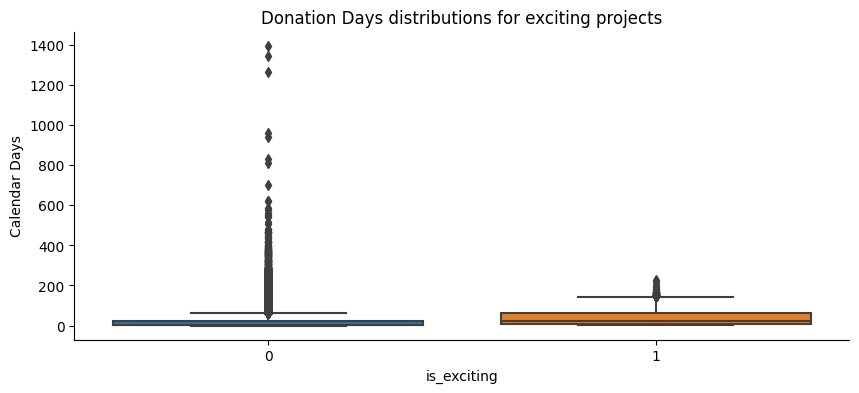

In [212]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(data = (dftime[['days_']]
                            .merge( afr.loc[:, ['is_exciting']], left_index=True, right_index=True, how='right' )
                            .fillna(0) # filling with 0 days those projects that do not appear in the outcomes
                            ),
                x='is_exciting', y='days_'
                )

ax.set_title("Donation Days distributions for exciting projects")
ax.set_ylabel('Calendar Days')

sns.despine(top=True, right=True)
plt.show()

* **Posting Trends:** to maintain the platform relevant a visualization on the posting dates trendline can be relevant to understand better the rate of new projects. As *"Time to exciting"* KPI shows, "exciting" projects get most of their donations during a shorter time-spawn.

# Future Work

One of the unlocked potentials of the dataset is on mining information contained on the tables resources, donations, and essays to enrich projects understanding. Although is assessed on this analysis if the project resource, focus area or social-economic status affect its business exciting value, doing text mining on written comments on donations for the donations, or essay structure or content, interesting insights can be discovered.

Designing a graph network analysis on the donations table can give extra information on the people (teacher and non-teacher) influencing more exciting projects or contributing with higher money to projects.